# Regressão logística

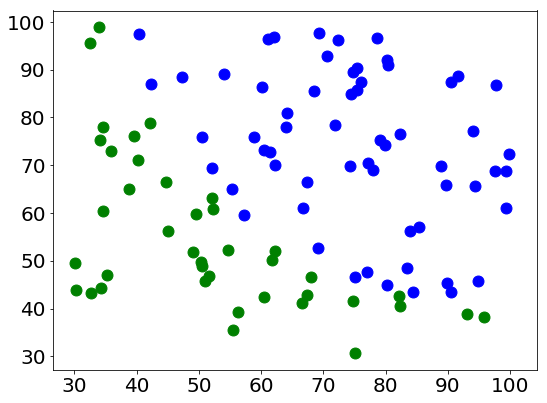

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import linear_regression_models as lin
import logistic_regression as logreg
import common as com

data_table = pd.read_csv('data/ex2data1.txt', header=None)
x = data_table.drop(data_table.columns[-1], axis=1).values
y = data_table.iloc[:,data_table.columns[-1]].values

labels = [0, 1]
colors = ['green', 'blue']

def plot_data(x, y, marker='o', legend=False, only_data=False):
    plt.rcParams.update({'font.size': com.fontsize})
    for i, label in enumerate(labels):
        if only_data:
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
        else:        
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
    if legend:
        plt.legend()
        
    
fig = plt.figure(figsize=com.figsize)
plot_data(x, y)
plt.show()
xlim = fig.gca().get_xlim() 
ylim = fig.gca().get_ylim() 

In [7]:
np.random.seed(12345)

number_train = int(np.ceil(0.7*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(y_train))
print("Número de padrões de teste: %d" % len(y_test))

Número de padrões de treinamento: 71
Número de padrões de teste: 29


## Normalização dos dados

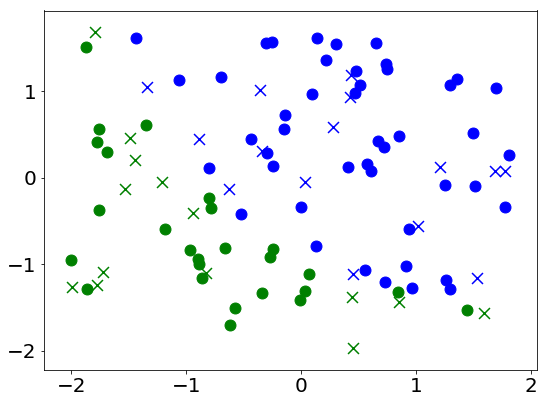

In [8]:
normalize_data = True

if normalize_data:
    x_mean = np.mean(x_train, axis=0)        
    x_train -= x_mean
    x_std = np.std(x_train, axis=0)
    x_train /= x_std
    
    x_test -= x_mean
    x_test /= x_std
    
    fig = plt.figure(figsize=com.figsize)
    plot_data(x_train, y_train)
    plot_data(x_test, y_test, marker='x')    
    plt.show()
    xlim = fig.gca().get_xlim() 
    ylim = fig.gca().get_ylim() 

## Solução via LMS

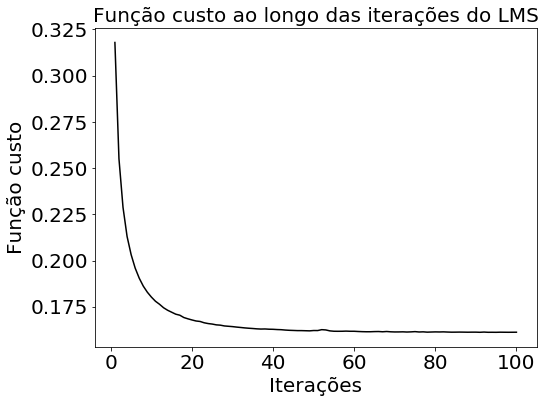

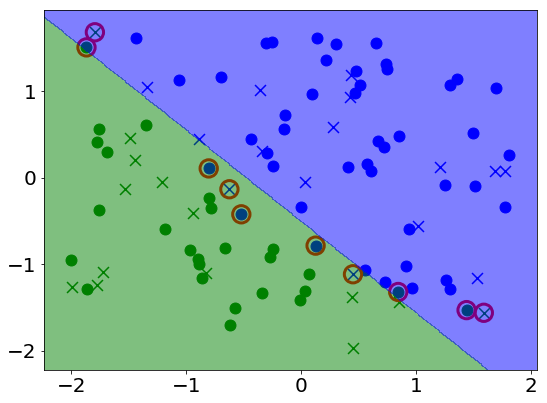

In [9]:
def return_label(x, w, poly_order=1):
    return np.array(lin.build_poly_regressors(x, poly_order=poly_order) @ w >= 0.5, dtype=int)

model_lms = logreg.lms(x=x_train, y=y_train, alpha=10**-1, num_epochs=100, build_regressors=True)  
w_lms = model_lms['w']    
loss_history_lms = model_lms['loss_history']
loss_lms = loss_history_lms[-1]

com.plot_loss_path(loss_history_lms, 'Função custo ao longo das iterações do LMS')

plt.rcParams.update({'font.size': com.fontsize})
fig, ax = plt.subplots(figsize=com.figsize)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plot_data(x_train, y_train)
plot_data(x_test, y_test, marker='x', only_data=False, legend=False)
wrong_index_train = y_train != return_label(x_train, w_lms)[:,0]
ax.scatter(x_train[wrong_index_train,0], x_train[wrong_index_train,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
wrong_index_test = y_test != return_label(x_test, w_lms)[:,0]
ax.scatter(x_test[wrong_index_test,0], x_test[wrong_index_test,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
xx, yy = com.make_meshgrid(x_train[:,0], x_train[:,1])
com.plot_contours(ax, w_lms, lambda x, w: np.sign(lin.build_poly_regressors(x) @ w - 0.5), xx, yy, colors)

In [10]:
print("Função custo ao final do treinamento: %.2e" % loss_lms)
print("Taxa de erro no treinamento: %.2f%%" % (100*np.mean(wrong_index_train)))
print("Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test)))

Função custo ao final do treinamento: 1.61e-01
Taxa de erro no treinamento: 8.45%
Taxa de erro no teste: 13.79%
